In [353]:
# Initial 
import os
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import datetime as dt
import chart_studio.plotly as py
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import cufflinks as cf
import alpaca_trade_api as tradeapi
import hvplot.pandas
%matplotlib inline
cf.go_offline()

In [354]:
load_dotenv()

True

In [355]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [356]:
# Create the Alpaca API Object
alpaca = tradeapi.REST(
alpaca_api_key,
alpaca_secret_key,
api_version="v2"

)

In [357]:
# format current date as ISO format
start = pd.Timestamp("2021-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-12-31", tz="America/New_York").isoformat()


In [358]:
#create top 10 nasdaq stock tickers
Stock_top10_tickers = ['AAPL', 'AMZN','AMD','ABNB','ALGN','AEP','ADI','ANSS','AMAT','ASML']
Stock_top10_tickers


['AAPL', 'AMZN', 'AMD', 'ABNB', 'ALGN', 'AEP', 'ADI', 'ANSS', 'AMAT', 'ASML']

In [359]:
# Set timeframe to one day ("1Day") for the Alpaca API
timeframe = "1Day"


In [360]:
# Get current closing prices for tickers
df_portfolio = alpaca.get_bars(
    Stock_top10_tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
df_portfolio.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2021-01-04 05:00:00+00:00,133.56,133.6116,126.760,129.41,143302687,1310228,129.732580,AAPL
2021-01-05 05:00:00+00:00,128.98,131.7400,128.430,131.01,97667342,707584,130.717944,AAPL
2021-01-06 05:00:00+00:00,127.53,131.0499,126.382,126.60,155104120,1202580,128.350036,AAPL
2021-01-07 05:00:00+00:00,128.38,131.6300,127.860,130.92,109581117,718363,130.153889,AAPL
2021-01-08 05:00:00+00:00,132.50,132.6300,130.230,132.05,105158675,800071,131.565744,AAPL


In [361]:
stocks_total_perf = pd.concat([df_portfolio], axis=1, join='outer', keys=['symbol'])
stocks_total_perf.head()

symbol                                        \
                             open      high      low   close     volume   
timestamp                                                                 
2021-01-04 05:00:00+00:00  133.56  133.6116  126.760  129.41  143302687   
2021-01-05 05:00:00+00:00  128.98  131.7400  128.430  131.01   97667342   
2021-01-06 05:00:00+00:00  127.53  131.0499  126.382  126.60  155104120   
2021-01-07 05:00:00+00:00  128.38  131.6300  127.860  130.92  109581117   
2021-01-08 05:00:00+00:00  132.50  132.6300  130.230  132.05  105158675   

                                                          
                          trade_count        vwap symbol  
timestamp                                                 
2021-01-04 05:00:00+00:00     1310228  129.732580   AAPL  
2021-01-05 05:00:00+00:00      707584  130.717944   AAPL  
2021-01-06 05:00:00+00:00     1202580  128.350036   AAPL  
2021-01-07 05:00:00+00:00      718363  130.153889   AAPL  
2021-01-08 05:00:00+00:00      800071  131.565744   AAPL

In [362]:

# Drop the following columns 'open', 'high', 'low', 'volume', 'trade_count', 'vwap'
columns=['open', 'high', 'low', 'volume', 'trade_count', 'vwap']
stock_df = df_portfolio.drop(columns, axis = 1)
stock_df.head()


,close,symbol
timestamp,,
2021-01-04 05:00:00+00:00,129.41,AAPL
2021-01-05 05:00:00+00:00,131.01,AAPL
2021-01-06 05:00:00+00:00,126.60,AAPL
2021-01-07 05:00:00+00:00,130.92,AAPL
2021-01-08 05:00:00+00:00,132.05,AAPL


In [363]:
#Find top ten performers in the portfolio at the beginning of the quarter
top10_performers_start_df = stock_df.loc['2021-01-04']
top10_performers_start_df.reset_index(inplace=True)
#top10_performersQ1_1_df = top10_performersQ1_1_df.sort_values('close', ascending=False)
#top10_performersQ1_1_df = top10_performersQ1_1_df.head(10)
top10_performers_start_df

,timestamp,close,symbol
0,2021-01-04 05:00:00+00:00,129.41,AAPL
1,2021-01-04 05:00:00+00:00,139.15,ABNB
2,2021-01-04 05:00:00+00:00,146.02,ADI
3,2021-01-04 05:00:00+00:00,81.54,AEP
4,2021-01-04 05:00:00+00:00,526.46,ALGN
5,2021-01-04 05:00:00+00:00,86.87,AMAT
6,2021-01-04 05:00:00+00:00,92.30,AMD
7,2021-01-04 05:00:00+00:00,3186.63,AMZN
8,2021-01-04 05:00:00+00:00,357.67,ANSS
9,2021-01-04 05:00:00+00:00,500.00,ASML


In [364]:
#plot
top10_pivot_start= top10_performers_start_df.pivot_table(values="close", index="timestamp", columns="symbol")
plot_start = top10_pivot_start.hvplot.bar(
    xlabel='Symbols',
    ylabel='Closing Value'
)
plot_start

:Bars   [timestamp,symbol]   (value)

In [365]:
#find how top 10 performers in portfolio did at the end of the first quarter
top10_performers_end_df = stock_df.loc['2021-12-31']
top10_performers_end_df.reset_index(inplace=True)
top10_performers_end_df

,timestamp,close,symbol
0,2021-12-31 05:00:00+00:00,177.57,AAPL
1,2021-12-31 05:00:00+00:00,166.49,ABNB
2,2021-12-31 05:00:00+00:00,175.77,ADI
3,2021-12-31 05:00:00+00:00,88.97,AEP
4,2021-12-31 05:00:00+00:00,657.18,ALGN
5,2021-12-31 05:00:00+00:00,157.36,AMAT
6,2021-12-31 05:00:00+00:00,143.90,AMD
7,2021-12-31 05:00:00+00:00,3334.34,AMZN
8,2021-12-31 05:00:00+00:00,401.12,ANSS
9,2021-12-31 05:00:00+00:00,796.14,ASML


In [366]:
top10_pivot_end= top10_performers_end_df.pivot_table(values="close", index="timestamp", columns="symbol")
plot_end = top10_pivot_end.hvplot.bar(
    xlabel='Symbols',
    ylabel='Closing Value', 
)
plot_end

:Bars   [timestamp,symbol]   (value)

In [368]:
plot_start*plot_end

:Overlay
   .Bars.I  :Bars   [timestamp,symbol]   (value)
   .Bars.II :Bars   [timestamp,symbol]   (value)

In [369]:
# create df containing info for the first quarter of the year '2021-01-04' through '2021-03-31'
tickers_1year = stock_df.loc['2021-01-04':'2021-12-31']
tickers_1year.reset_index(inplace=True)

tickers_1year

C:\Users\naaku\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



,timestamp,close,symbol
0,2021-01-04 05:00:00+00:00,129.41,AAPL
1,2021-01-05 05:00:00+00:00,131.01,AAPL
2,2021-01-06 05:00:00+00:00,126.60,AAPL
3,2021-01-07 05:00:00+00:00,130.92,AAPL
4,2021-01-08 05:00:00+00:00,132.05,AAPL
...,...,...,...
2515,2021-12-27 05:00:00+00:00,811.43,ASML
2516,2021-12-28 05:00:00+00:00,804.77,ASML
2517,2021-12-29 05:00:00+00:00,801.98,ASML
2518,2021-12-30 05:00:00+00:00,800.22,ASML


In [370]:
tickers_1year.max()

timestamp    2021-12-31 05:00:00+00:00
close                          3731.41
symbol                            ASML
dtype: object

In [371]:
first_day = df_portfolio.loc['2021-01-04']
first_day.reset_index(inplace=True)
first_day

,timestamp,open,high,low,close,volume,trade_count,vwap,symbol
0,2021-01-04 05:00:00+00:00,133.56,133.6116,126.760,129.41,143302687,1310228,129.732580,AAPL
1,2021-01-04 05:00:00+00:00,151.00,151.0050,137.000,139.15,6415486,106339,142.505350,ABNB
2,2021-01-04 05:00:00+00:00,148.45,150.5450,144.620,146.02,2496642,43136,146.980214,ADI
3,2021-01-04 05:00:00+00:00,83.33,83.4400,81.205,81.54,3232971,34798,81.783354,AEP
4,2021-01-04 05:00:00+00:00,549.61,560.0000,519.700,526.46,602433,18222,534.162545,ALGN
5,2021-01-04 05:00:00+00:00,87.14,89.3000,86.150,86.87,8449949,79765,87.348187,AMAT
6,2021-01-04 05:00:00+00:00,92.13,96.0600,90.915,92.30,51802652,381394,93.098152,AMD
7,2021-01-04 05:00:00+00:00,3270.00,3272.0000,3144.020,3186.63,4411486,244078,3193.609570,AMZN
8,2021-01-04 05:00:00+00:00,362.35,373.7900,353.745,357.67,521740,15462,360.304615,ANSS
9,2021-01-04 05:00:00+00:00,499.99,504.7500,490.710,500.00,1527642,27183,499.055421,ASML


In [372]:
last_day = df_portfolio.loc['2021-12-31']
last_day.reset_index(inplace=True)
last_day.head()

,timestamp,open,high,low,close,volume,trade_count,vwap,symbol
0,2021-12-31 05:00:00+00:00,178.00,179.23,177.26,177.57,64038680,451478,177.800285,AAPL
1,2021-12-31 05:00:00+00:00,168.78,170.87,166.08,166.49,2595087,42536,167.276451,ABNB
2,2021-12-31 05:00:00+00:00,174.75,176.66,174.58,175.77,1916631,33470,175.731838,ADI
3,2021-12-31 05:00:00+00:00,88.64,89.22,88.30,88.97,1519921,22968,88.878485,AEP
4,2021-12-31 05:00:00+00:00,660.95,674.89,655.62,657.18,461369,13916,664.279136,ALGN


In [373]:
last_day.iplot()

In [374]:
initial_investment = 10000
# 10% of 10000 = 1000 to buy a number of share
first_day['share'] = (0.01*initial_investment)
first_day['share'] = ((0.01*initial_investment)/first_day['close'])

first_day['value'] = first_day['share'] * first_day['close']

#first_day_AAPL = (.01*initial_investment)/ day_1

In [375]:
first_day.head()

,timestamp,open,high,low,close,volume,trade_count,vwap,symbol,share,value
0,2021-01-04 05:00:00+00:00,133.56,133.6116,126.760,129.41,143302687,1310228,129.732580,AAPL,0.772738,100.0
1,2021-01-04 05:00:00+00:00,151.00,151.0050,137.000,139.15,6415486,106339,142.505350,ABNB,0.718649,100.0
2,2021-01-04 05:00:00+00:00,148.45,150.5450,144.620,146.02,2496642,43136,146.980214,ADI,0.684838,100.0
3,2021-01-04 05:00:00+00:00,83.33,83.4400,81.205,81.54,3232971,34798,81.783354,AEP,1.226392,100.0
4,2021-01-04 05:00:00+00:00,549.61,560.0000,519.700,526.46,602433,18222,534.162545,ALGN,0.189948,100.0


In [376]:
#first_day.columns.names = ['Stock Info']

#first_day

In [377]:
first_day_return =first_day.xs(key=['open','close','symbol'], axis=1)
first_day_return

C:\Users\naaku\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.



,open,close,symbol
0,133.56,129.41,AAPL
1,151.00,139.15,ABNB
2,148.45,146.02,ADI
3,83.33,81.54,AEP
4,549.61,526.46,ALGN
5,87.14,86.87,AMAT
6,92.13,92.30,AMD
7,3270.00,3186.63,AMZN
8,362.35,357.67,ANSS
9,499.99,500.00,ASML


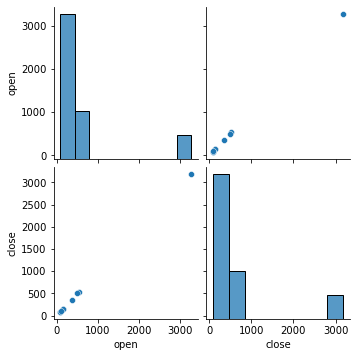

In [378]:
#Create a pairplot using seaborn of first_day_return dataframe. What stocks stands out?
sns.pairplot(first_day_return[1:])


In [379]:
first_day_return.min()

open      83.33
close     81.54
symbol     AAPL
dtype: object

In [380]:
initial_investment = 10000
# 10% of 10000 = 1000 to buy a number of share
last_day['share'] = (0.01*initial_investment)
last_day['share'] = ((0.01*initial_investment)/last_day['close'])

last_day['value'] = first_day['share'] * last_day['close']

#first_day_AAPL = (.01*initial_investment)/ day_1

In [381]:
last_day.head()

,timestamp,open,high,low,close,volume,trade_count,vwap,symbol,share,value
0,2021-12-31 05:00:00+00:00,178.00,179.23,177.26,177.57,64038680,451478,177.800285,AAPL,0.563158,137.215053
1,2021-12-31 05:00:00+00:00,168.78,170.87,166.08,166.49,2595087,42536,167.276451,ABNB,0.600637,119.647862
2,2021-12-31 05:00:00+00:00,174.75,176.66,174.58,175.77,1916631,33470,175.731838,ADI,0.568925,120.373921
3,2021-12-31 05:00:00+00:00,88.64,89.22,88.30,88.97,1519921,22968,88.878485,AEP,1.123974,109.112092
4,2021-12-31 05:00:00+00:00,660.95,674.89,655.62,657.18,461369,13916,664.279136,ALGN,0.152165,124.829997


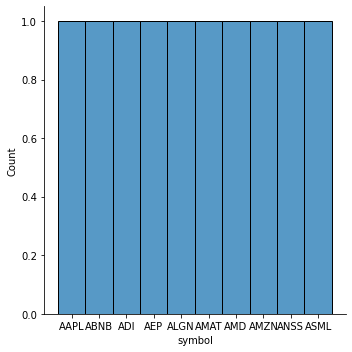

In [382]:
sns.displot(first_day['symbol'], kde=False, bins= 30)

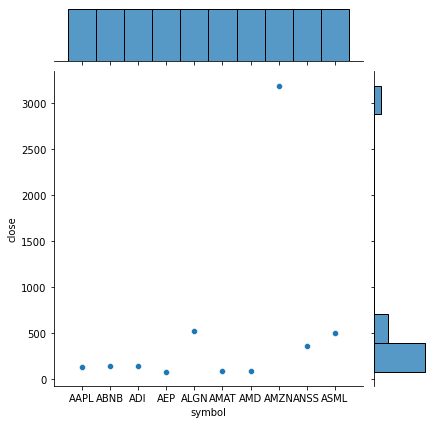

In [383]:
sns.jointplot(x='symbol', y='close', data=first_day)

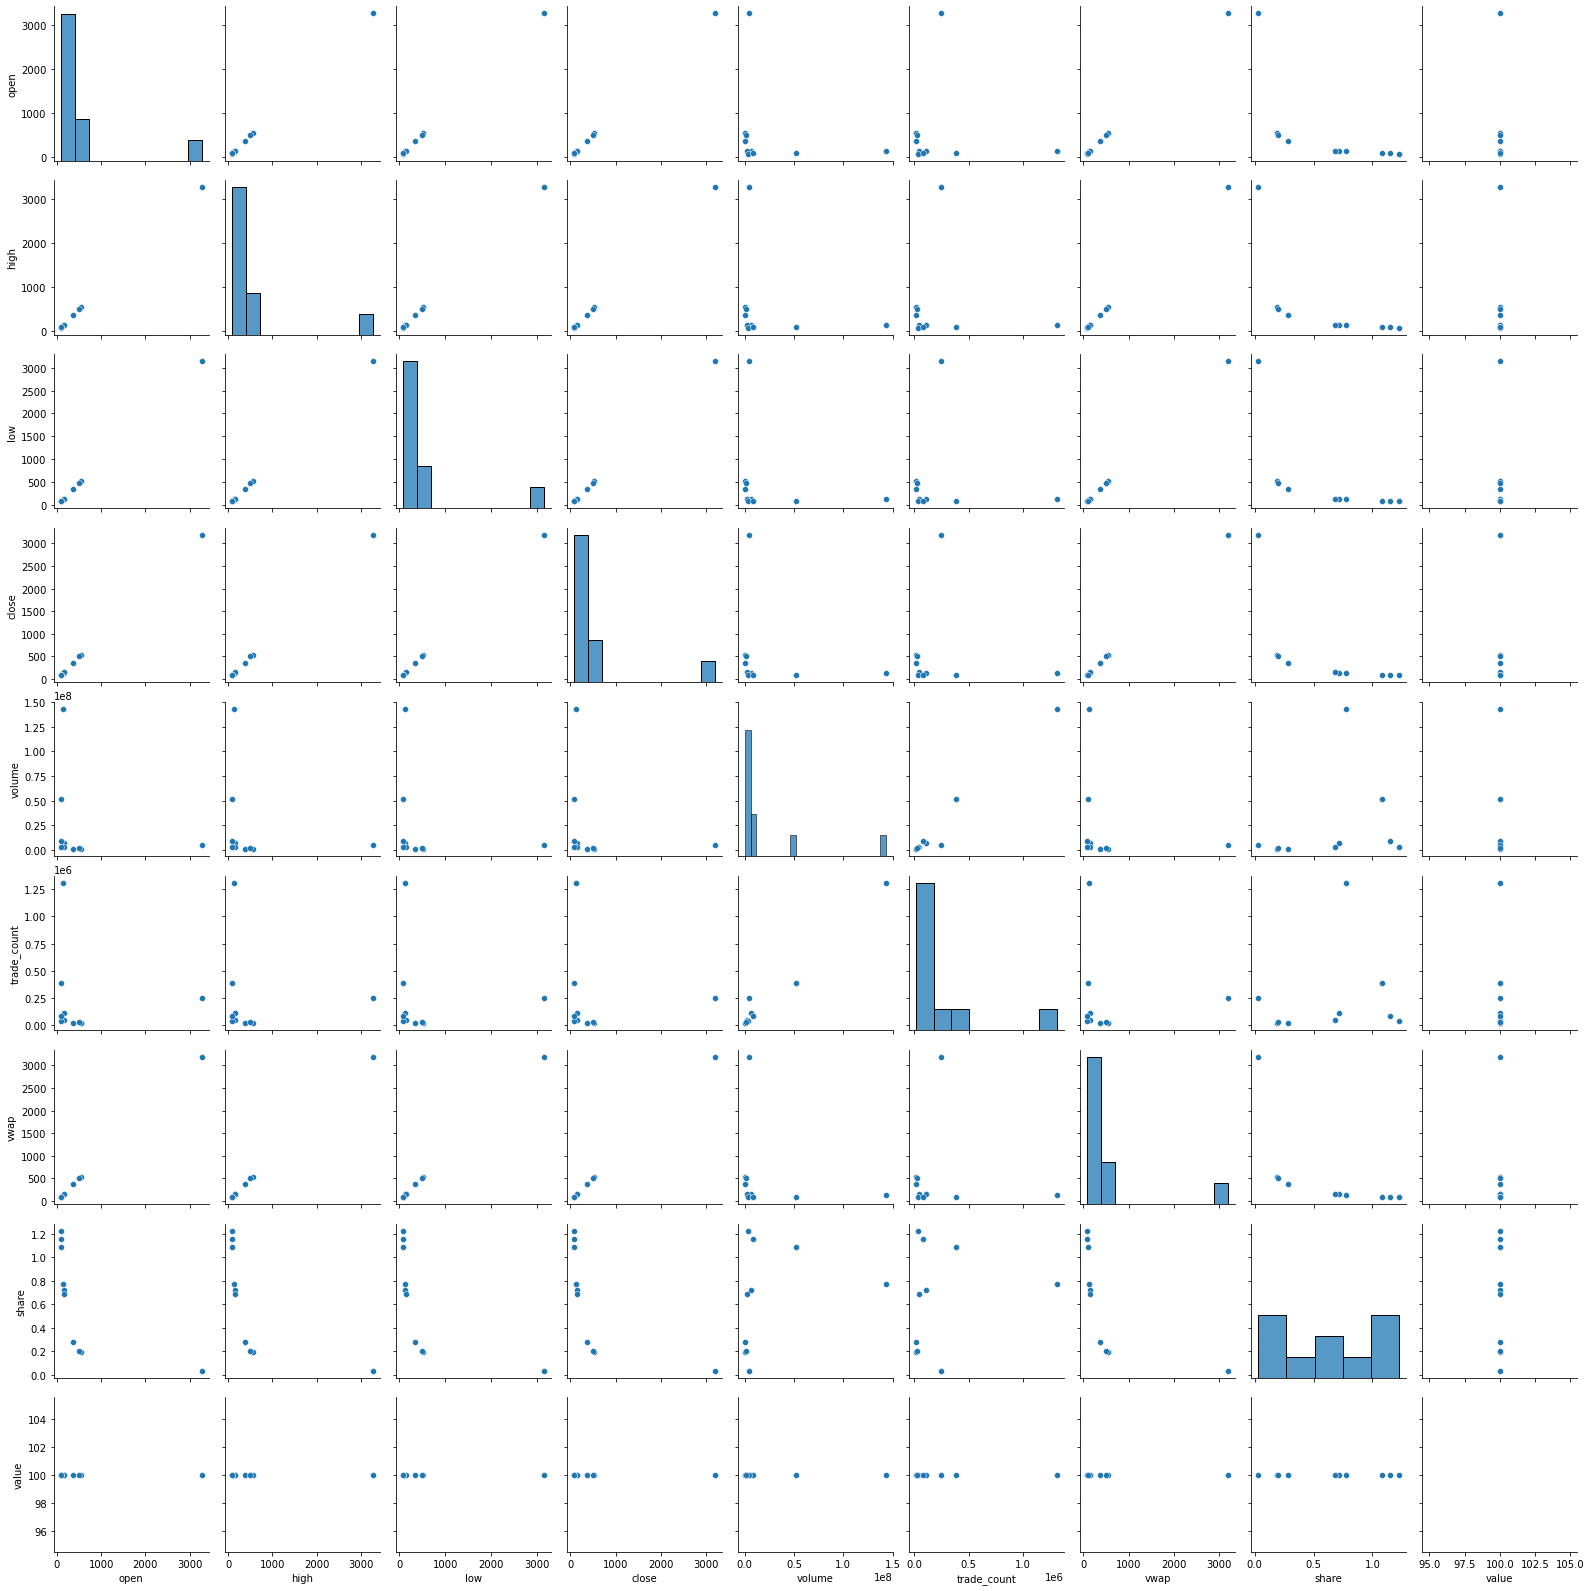

In [384]:
sns.pairplot(first_day)

In [385]:
first_day.iplot()